In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [7]:
x=df.drop('Price',axis=1)
y=df['Price']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=555)

In [9]:
df.shape

(5000, 6)

In [10]:
print('X train Shape:',X_train.shape)
print('X test Shape:',X_test.shape)
print('y train Shape:',y_train.shape)
print('y test Shape:',y_test.shape)

X train Shape: (4000, 5)
X test Shape: (1000, 5)
y train Shape: (4000,)
y test Shape: (1000,)


In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(X_test)

In [13]:
col_index=0
for i in lr.coef_:
    print(df.columns[col_index])
    print('slope:',round(i,2))
    col_index+=1
    print('*'*30)
print('Y-intercept:',lr.intercept_)

Avg. Area Income
slope: 21.59
******************************
Avg. Area House Age
slope: 164499.23
******************************
Avg. Area Number of Rooms
slope: 119970.77
******************************
Avg. Area Number of Bedrooms
slope: 2059.82
******************************
Area Population
slope: 15.29
******************************
Y-intercept: -2630570.4421584536


In [15]:
sse=sum((y_test-y_pred)**2)
print('Sum of Squared Error:',sse)

mse= sse/len(X_test)
print('Mean Sqaure Error:',mse)

rmse= np.sqrt(mse)
print('Root Mean Square Error:',rmse)

Sum of Squared Error: 10012400493463.857
Mean Sqaure Error: 10012400493.463858
Root Mean Square Error: 100061.98325769811


In [17]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

100061.9832576981

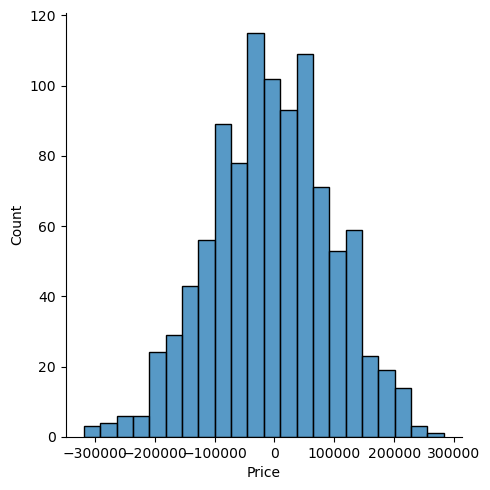

In [19]:
sns.displot(y_test-y_pred)

In [31]:
income=float(input('What is your Income'))
age=float(input('What is your House Age'))
rooms=float(input('What is your Number of Rooms'))
bedroom=float(input('What is your Number of Bedrooms'))
pop=float(input('What is your Area Population'))
user_input=np.array([income,age,rooms,bedroom,pop])

What is your Income 250000
What is your House Age 10
What is your Number of Rooms 6
What is your Number of Bedrooms 3
What is your Area Population 700


In [33]:
house_price_pred=lr.predict(user_input.reshape(1, -1))
print(f'Your house can be sold between ${round(house_price_pred[0])-50000} to ${round(house_price_pred[0])+50000}')

Your house can be sold between $5099230 to $5199230


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [36]:
import joblib
joblib.dump(lr, 'usa house price pred model 100k rmse 25-08-25.pkl')

['usa house price pred model 100k rmse 25-08-25.pkl']